# Imports & File Load

In [234]:
import pandas as pd
import numpy as np
import pandas_profiling
# import requests
# import json
import re
# import os
# import time
# from bs4 import BeautifulSoup
from collections import Counter
%matplotlib inline

In [235]:
df = pd.read_csv("sources/judges.csv")
df.head()

,nid,jid,Last Name,First Name,Middle Name,Suffix,Birth Month,Birth Day,Birth Year,Birth City,...,Degree (3),Degree Year (3),School (4),Degree (4),Degree Year (4),School (5),Degree (5),Degree Year (5),Professional Career,Other Nominations/Recess Appointments
0,1394646,3563,Abrams,Leslie,Joyce,,NaN,NaN,1974,Madison,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Marvin J. Garbis, U.S. Distric...",NaN
1,1393931,3419,Abrams,Ronnie,,,NaN,NaN,1968,New York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Thomas P. Griesa, U.S. Distric...",NaN
2,1376976,1,Abruzzo,Matthew,T.,,4.0,30.0,1889,Brooklyn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Brooklyn, New York, 1910-1936",NaN
3,1376981,2,Acheson,Marcus,Wilson,,6.0,7.0,1828,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Pittsburgh, Pennsylvania, 18...",NaN
4,1376986,3,Acker,William,Marsh,Jr.,10.0,25.0,1927,Birmingham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"U.S. Army private first class, 1946-1947; Priv...",NaN


# File Investigation

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Columns: 201 entries, nid to Other Nominations/Recess Appointments
dtypes: float64(43), int64(2), object(156)
memory usage: 3.5+ MB


In [237]:
original_size = df.memory_usage().sum()
original_size

3634936

In [238]:
# df.dtypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 201 columns):
nid                                      int64
jid                                      int64
Last Name                                object
First Name                               object
Middle Name                              object
Suffix                                   object
Birth Month                              float64
Birth Day                                float64
Birth Year                               object
Birth City                               object
Birth State                              object
Death Month                              float64
Death Day                                float64
Death Year                               float64
Death City                               object
Death State                              object
Gender                                   object
Race or Ethnicity                        object
Court Type (1)           

In [239]:
# df = df.drop(columns='url')

In [240]:
# df.profile_report()

# Basic Clean
- make easy column headers
- remove the circa abbreviation everywhere 
- convert separated birth/death info to united field
- convert all string dates into datetime
- convert year-only dates into datetime

In [241]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '-')
df.columns = df.columns.str.replace('\(|\)|,', '')
df.replace('ca. ','',regex=True,inplace=True)

In [242]:
df['Birth_Month'] = pd.to_numeric(df['Birth_Month'], errors='coerce').fillna(value=9).astype(int)
df['Birth_Day'] = pd.to_numeric(df['Birth_Day'], errors='coerce').fillna(value=30).astype(int)
df['Birth_Year'] = pd.to_numeric(df['Birth_Year'], errors='coerce').fillna(value=1677).astype(int)
df['Birth_Date'] = df.Birth_Year.map(str).astype(str).str.zfill(4) + '-' + df.Birth_Month.map(str).astype(str).str.zfill(2) + '-' + df.Birth_Day.map(str).astype(str).str.zfill(2)
df['Death_Month'] = pd.to_numeric(df['Death_Month'], errors='coerce').fillna(value=9).astype(int)
df['Death_Day'] = pd.to_numeric(df['Death_Day'], errors='coerce').fillna(value=30).astype(int)
df['Death_Year'] = pd.to_numeric(df['Death_Year'], errors='coerce').fillna(value=1677).astype(int)
df['Death_Date'] = df.Death_Year.map(str).astype(str).str.zfill(4) + '-' + df.Death_Month.map(str).astype(str).str.zfill(2) + '-' + df.Death_Day.map(str).astype(str).str.zfill(2)

In [243]:
df.Death_Date.head()

0    1677-09-30
1    1677-09-30
2    1971-05-28
3    1906-06-21
4    2018-06-21
Name: Death_Date, dtype: object

In [244]:
forceDT = [
    'Birth_Date',
    'Death_Date',
    'Recess_Appointment_Date_1',
    'Nomination_Date_1',
    'Committee_Referral_Date_1',
    'Hearing_Date_1',
    'Committee_Action_Date_1',
    'Confirmation_Date_1',
    'Commission_Date_1',
    'Service_as_Chief_Judge_Begin_1',
    'Service_as_Chief_Judge_End_1',
    '2nd_Service_as_Chief_Judge_Begin_1',
    '2nd_Service_as_Chief_Judge_End_1',
    'Senior_Status_Date_1',
    'Termination_Date_1',
    'Recess_Appointment_Date_2',
    'Nomination_Date_2',
    'Committee_Referral_Date_2',
    'Hearing_Date_2',
    'Committee_Action_Date_2',
    'Confirmation_Date_2',
    'Commission_Date_2',
    'Service_as_Chief_Judge_Begin_2',
    'Service_as_Chief_Judge_End_2',
    '2nd_Service_as_Chief_Judge_Begin_2',
    '2nd_Service_as_Chief_Judge_End_2',
    'Senior_Status_Date_2',
    'Termination_Date_2',
    'Recess_Appointment_Date_3',
    'Nomination_Date_3',
    'Committee_Referral_Date_3',
    'Hearing_Date_3',
    'Committee_Action_Date_3',
    'Confirmation_Date_3',
    'Commission_Date_3',
    'Service_as_Chief_Judge_Begin_3',
    'Service_as_Chief_Judge_End_3',
    '2nd_Service_as_Chief_Judge_Begin_3',
    '2nd_Service_as_Chief_Judge_End_3',
    'Senior_Status_Date_3',
    'Termination_Date_3',
    'Recess_Appointment_Date_4',
    'Nomination_Date_4',
    'Committee_Referral_Date_4',
    'Hearing_Date_4',
    'Committee_Action_Date_4',
    'Confirmation_Date_4',
    'Commission_Date_4',
    'Service_as_Chief_Judge_Begin_4',
    'Service_as_Chief_Judge_End_4',
    '2nd_Service_as_Chief_Judge_Begin_4',
    '2nd_Service_as_Chief_Judge_End_4',
    'Senior_Status_Date_4',
    'Termination_Date_4',
    'Recess_Appointment_Date_5',
    'Nomination_Date_5',
    'Committee_Referral_Date_5',
    'Hearing_Date_5',
    'Committee_Action_Date_5',
    'Confirmation_Date_5',
    'Commission_Date_5',
    'Service_as_Chief_Judge_Begin_5',
    'Service_as_Chief_Judge_End_5',
    '2nd_Service_as_Chief_Judge_Begin_5',
    '2nd_Service_as_Chief_Judge_End_5',
    'Senior_Status_Date_5',
    'Termination_Date_5',
    'Recess_Appointment_Date_6',
    'Nomination_Date_6',
    'Committee_Referral_Date_6',
    'Hearing_Date_6',
    'Committee_Action_Date_6',
    'Confirmation_Date_6',
    'Commission_Date_6',
    'Service_as_Chief_Judge_Begin_6',
    'Service_as_Chief_Judge_End_6',
    '2nd_Service_as_Chief_Judge_Begin_6',
    '2nd_Service_as_Chief_Judge_End_6',
    'Senior_Status_Date_6',
    'Termination_Date_6'
]
df[forceDT] = df[forceDT].apply(pd.to_datetime)
df.dtypes.head(50)

nid                                            int64
jid                                            int64
Last_Name                                     object
First_Name                                    object
Middle_Name                                   object
Suffix                                        object
Birth_Month                                    int32
Birth_Day                                      int32
Birth_Year                                     int32
Birth_City                                    object
Birth_State                                   object
Death_Month                                    int32
Death_Day                                      int32
Death_Year                                     int32
Death_City                                    object
Death_State                                   object
Gender                                        object
Race_or_Ethnicity                             object
Court_Type_1                                  

In [245]:
df['Degree_Year_1'] = pd.to_datetime(df['Degree_Year_1'],format='%Y', errors='coerce')
df['Degree_Year_2'] = pd.to_datetime(df['Degree_Year_2'],format='%Y', errors='coerce')
df['Degree_Year_3'] = pd.to_datetime(df['Degree_Year_3'],format='%Y', errors='coerce')
df['Degree_Year_4'] = pd.to_datetime(df['Degree_Year_4'],format='%Y', errors='coerce')
df['Degree_Year_5'] = pd.to_datetime(df['Degree_Year_5'],format='%Y', errors='coerce')

In [246]:
df['Full_Name'] = df.First_Name + ' ' + df.Middle_Name + ' ' + df.Last_Name
df.Full_Name.replace(r'\s{2,4}',' ',regex=True,inplace=True)
df.Full_Name.head()

0      Leslie Joyce Abrams
1            Ronnie Abrams
2       Matthew T. Abruzzo
3    Marcus Wilson Acheson
4      William Marsh Acker
Name: Full_Name, dtype: object

In [247]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 204 columns):
nid                                      int64
jid                                      int64
Last_Name                                object
First_Name                               object
Middle_Name                              object
Suffix                                   object
Birth_Month                              int32
Birth_Day                                int32
Birth_Year                               int32
Birth_City                               object
Birth_State                              object
Death_Month                              int32
Death_Day                                int32
Death_Year                               int32
Death_City                               object
Death_State                              object
Gender                                   object
Race_or_Ethnicity                        object
Court_Type_1                        

# Basic Research

### Most Appointments

In [15]:
df.Appointing_President_1.value_counts().head()

William J. Clinton    357
Ronald Reagan         347
George W. Bush        310
Barack Obama          308
Jimmy Carter          247
Name: Appointing_President_1, dtype: int64

### Qualifications
- ABA Rating
- Committee Recommendations
- Termination Types

In [16]:
df.ABA_Rating_1.value_counts()

Well Qualified                    1248
Qualified                          948
Not Qualified                       17
Exceptionally Well Qualified        11
Not Qualified By Reason of Age       3
Name: ABA_Rating_1, dtype: int64

In [17]:
df[df.ABA_Rating_1.str.contains("Not", na=False)]['Appointing_President_1'].value_counts()

Lyndon B. Johnson     5
George W. Bush        4
Donald J. Trump       4
William J. Clinton    3
Jimmy Carter          3
John F. Kennedy       1
Name: Appointing_President_1, dtype: int64

In [18]:
df[df.ABA_Rating_1.str.contains("Not", na=False)][['Last_Name','ABA_Rating_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,ABA_Rating_1,Appointing_President_1,Confirmation_Date_1
1829,Kobes,Not Qualified,Donald J. Trump,2018-12-11
1242,Goodwin,Not Qualified,Donald J. Trump,2018-08-28
3261,Teeter,Not Qualified,Donald J. Trump,2018-08-01
1269,Grasz,Not Qualified,Donald J. Trump,2017-12-12
3385,Van Tatenhove,Not Qualified,George W. Bush,2005-12-21
1609,Irizarry,Not Qualified,George W. Bush,2004-06-24
220,Benitez,Not Qualified,George W. Bush,2004-06-17
444,Bunning,Not Qualified,George W. Bush,2002-02-14
1352,Hamilton,Not Qualified,William J. Clinton,1994-10-07
1724,Katz,Not Qualified,William J. Clinton,1994-10-07


In [19]:
df[df.ABA_Rating_2.str.contains("Not", na=False)][['Last_Name','ABA_Rating_2','Appointing_President_2','Confirmation_Date_2']].sort_values(by='Confirmation_Date_2', ascending=False)

,Last_Name,ABA_Rating_2,Appointing_President_2,Confirmation_Date_2
2487,O'Brien,Not Qualified,Jimmy Carter,1978-10-04
605,Christie,Not Qualified By Reason of Age,Lyndon B. Johnson,1964-04-30


In [20]:
df[df.ABA_Rating_3.str.contains("Not", na=False)][['Last_Name','ABA_Rating_3','Appointing_President_3','Confirmation_Date_3']].sort_values(by='Confirmation_Date_3', ascending=False)

,Last_Name,ABA_Rating_3,Appointing_President_3,Confirmation_Date_3


In [21]:
df.Judiciary_Committee_Action_1.value_counts()

Reported (favorably)                     3378
Reported (no recommendation recorded)      99
Not Referred to Committee                  84
No Committee before December 10, 1816      84
Not Reported                               15
Reported (unfavorably)                      9
Reported (unknown)                          9
Reported (without recommendation)           4
Recommended Postponement                    1
Name: Judiciary_Committee_Action_1, dtype: int64

In [22]:
df[~df.Judiciary_Committee_Action_1.str.contains("\(favorably", na=False)][['Last_Name','Judiciary_Committee_Action_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False).dropna().head(60)

,Last_Name,Judiciary_Committee_Action_1,Appointing_President_1,Confirmation_Date_1
1512,Holmes,Reported (without recommendation),George W. Bush,2004-07-06
2055,Manion,Reported (without recommendation),Ronald Reagan,1986-06-26
2286,Miller,Not Referred to Committee,Richard M. Nixon,1973-06-28
1456,Hickey,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
2969,Seitz,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
3091,Smith,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
1430,Heebe,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
975,Edwards,Reported (no recommendation recorded),John F. Kennedy,1963-12-16
935,Dumbauld,Not Reported,John F. Kennedy,1961-08-02
3588,Wilson,Reported (no recommendation recorded),John F. Kennedy,1961-06-14


In [23]:
df.Termination_1.value_counts()

Death                                       1417
Appointment to Another Judicial Position     353
Retirement                                   271
Resignation                                  235
Reassignment                                 116
Abolition of Court                            29
Recess Appointment-Not Confirmed              23
Impeachment & Conviction                       7
Name: Termination_1, dtype: int64

In [24]:
df[df.Termination_1.str.contains("Impeachment", na=False)][['First_Name','Last_Name','Termination_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,First_Name,Last_Name,Termination_1,Appointing_President_1,Confirmation_Date_1
2656,G.,Porteous,Impeachment & Conviction,William J. Clinton,1994-10-07
1400,Alcee,Hastings,Impeachment & Conviction,Jimmy Carter,1979-10-31
612,Harry,Claiborne,Impeachment & Conviction,Jimmy Carter,1978-08-11
2462,Walter,Nixon,Impeachment & Conviction,Lyndon B. Johnson,1968-06-06
2790,Halsted,Ritter,Impeachment & Conviction,Calvin Coolidge,1929-02-15
1574,West,Humphreys,Impeachment & Conviction,Franklin Pierce,1853-03-26
2619,John,Pickering,Impeachment & Conviction,George Washington,1795-02-11


In [25]:
df[df.Termination_1.str.contains("Recess", na=False)][['Last_Name','Termination_1','Appointing_President_1','Recess_Appointment_Date_1']].sort_values(by='Recess_Appointment_Date_1', ascending=False)

,Last_Name,Termination_1,Appointing_President_1,Recess_Appointment_Date_1
1431,Heen,Recess Appointment-Not Confirmed,Jimmy Carter,1981-01-01
2703,Rabinovitz,Recess Appointment-Not Confirmed,Lyndon B. Johnson,1964-01-07
1040,Feikens,Recess Appointment-Not Confirmed,Dwight D. Eisenhower,1960-10-13
1443,Henley,Recess Appointment-Not Confirmed,Dwight D. Eisenhower,1958-10-25
1125,Friedman,Recess Appointment-Not Confirmed,Harry S Truman,1952-07-17
71,Andrews,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
3229,Switzer,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
1380,Harper,Recess Appointment-Not Confirmed,Harry S Truman,1947-08-07
2798,Roberts,Recess Appointment-Not Confirmed,Franklin D. Roosevelt,1938-07-06
1650,Johnson,Recess Appointment-Not Confirmed,Herbert Hoover,1932-08-03


### Gender & Race Breakdowns

In [26]:
df.groupby(by='Party_of_Appointing_President_1').Gender.value_counts(1)

Party_of_Appointing_President_1  Gender
Democratic                       Male      0.836675
                                 Female    0.163325
Federalist                       Male      1.000000
Jeffersonian Republican          Male      1.000000
None (reassignment)              Male      1.000000
Republican                       Male      0.914286
                                 Female    0.085714
Whig                             Male      1.000000
Name: Gender, dtype: float64

In [27]:
df.groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts(1)

Party_of_Appointing_President_1  Race_or_Ethnicity              
Democratic                       White                              0.843750
                                 AfriAmerican                       0.095519
                                 Hispanic                           0.040094
                                 Asian American                     0.013561
                                 AmeriIndian                        0.001769
                                 AfriAmerican/Hispanic              0.001179
                                 Asian American/Pacific Islander    0.001179
                                 Hispanic/White                     0.001179
                                 AfriAmerican/White                 0.000590
                                 Asian American/Hispanic            0.000590
                                 Asian American/White               0.000590
Federalist                       White                              1.000000
Jeffersonia

### Declined & Rejected Appointments

In [28]:
df[df['Other_Nominations-Recess_Appointments'].str.contains("(?i)Declined", na=False)][['Last_Name','Other_Nominations-Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,Other_Nominations-Recess_Appointments,Appointing_President_1,Confirmation_Date_1
307,Boreman,Received recess appointment to U.S. Court of A...,Dwight D. Eisenhower,1954-07-21
1652,Johnson,"Nominated to U.S. Customs Court, March 29, 194...",Harry S Truman,1947-06-23
41,Allred,Received recess appointment to U.S. District C...,Franklin D. Roosevelt,1939-02-16
1160,Garrett,Received recess appointment to U.S. District C...,Calvin Coolidge,1929-02-18
2138,McCarthy,Nominated to U.S. District Court for the Distr...,Calvin Coolidge,1929-01-08
2467,Norcross,Received recess appointment to U.S. Court of A...,Calvin Coolidge,1928-04-17
829,Day,Received recess appointment to U.S. District C...,William McKinley,1899-02-28
864,Dick,Received recess appointment to U.S. District C...,Ulysses Grant,1872-06-07
3609,Withey,Nominated to U.S. District Court for the Weste...,Abraham Lincoln,1863-03-11
1980,Livingston,Received recess appointment to U.S. District C...,Thomas Jefferson,1806-12-17


In [29]:
df[df['Other_Nominations-Recess_Appointments'].str.contains("(?i)Rejected", na=False)][['Last_Name','Other_Nominations-Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,Other_Nominations-Recess_Appointments,Appointing_President_1,Confirmation_Date_1
3536,White,Nominated to U.S. District Court for the Easte...,Barack Obama,2014-07-16
308,Bork,Nominated to Supreme Court of the United State...,Ronald Reagan,1982-02-08
539,Carswell,Nominated to Supreme Court of the United State...,Dwight D. Eisenhower,1958-03-31
1418,Haynsworth,Nominated to Supreme Court of the United State...,Dwight D. Eisenhower,1957-04-04
2555,Parker,Nominated to Supreme Court of the United State...,Calvin Coolidge,1925-12-14
3355,Turner,Nominated to U.S. District Court for the North...,Rutherford B. Hayes,1880-12-20
2878,Rutledge,Nominated to be Chief Justice of the Supreme C...,George Washington,1789-09-26
71,Andrews,Nominated to U.S. District Court for the North...,Harry S Truman,NaT
2136,McCamant,Nominated to U.S. Court of Appeals for the Nin...,Calvin Coolidge,NaT
2798,Roberts,Nominated to U.S. District Court for the Weste...,Franklin D. Roosevelt,NaT


In [30]:
df['Other_Nomination'] = df["Other_Nominations-Recess_Appointments"].str.findall(r"\b(nominated.*\d\d\d\d); .*", flags = re.I).dropna(0)
df['Other_Rejection'] = df["Other_Nominations-Recess_Appointments"].str.findall(r"\b(rejected.*\d\d\d\d).*", flags = re.I).dropna(0)
df[df['Other_Nominations-Recess_Appointments'].str.contains(r"rejected", na=False, flags = re.I)][['Last_Name','Other_Nomination','Other_Rejection','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)


,Last_Name,Other_Nomination,Other_Rejection,Appointing_President_1,Confirmation_Date_1
3536,White,[Nominated to U.S. District Court for the East...,"[rejected by Senate, October 5, 1999; Nominate...",Barack Obama,2014-07-16
308,Bork,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, October 23, 1987]",Ronald Reagan,1982-02-08
539,Carswell,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, April 8, 1970]",Dwight D. Eisenhower,1958-03-31
1418,Haynsworth,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, November 21, 1969]",Dwight D. Eisenhower,1957-04-04
2555,Parker,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, May 7, 1930]",Calvin Coolidge,1925-12-14
3355,Turner,[Nominated to U.S. District Court for the Nort...,"[rejected by Senate, April 2, 1879]",Rutherford B. Hayes,1880-12-20
2878,Rutledge,[Nominated to be Chief Justice of the Supreme ...,"[rejected by Senate, December 15, 1795; resign...",George Washington,1789-09-26
71,Andrews,[Nominated to U.S. District Court for the Nort...,"[rejected by Senate, August 9, 1950; resigned,...",Harry S Truman,NaT
2136,McCamant,[Nominated to U.S. Court of Appeals for the Ni...,"[rejected by Senate, March 17, 1926; resigned,...",Calvin Coolidge,NaT
2798,Roberts,[Nominated to U.S. District Court for the West...,"[rejected by Senate, February 6, 1939; resigne...",Franklin D. Roosevelt,NaT


In [31]:
# df.apply(lambda x: x.str.contains(r"declined").any()).idxmax()
# df.apply(lambda x: x.str.startswith(r"Nominated").any()).idxmax()

In [32]:
df.loc[df.Party_of_Reappointing_President_1 != df.Party_of_Appointing_President_1][['Last_Name','Appointing_President_1','Reappointing_President_1','Recess_Appointment_Date_1','Nomination_Date_1','Confirmation_Date_1']].dropna().sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,Appointing_President_1,Reappointing_President_1,Recess_Appointment_Date_1,Nomination_Date_1,Confirmation_Date_1
1287,Gregory,William J. Clinton,George W. Bush,2000-12-27,2001-05-09,2001-07-20


### Professional Background

In [33]:
df.Professional_Career

0       Law clerk, Hon. Marvin J. Garbis, U.S. Distric...
1       Law clerk, Hon. Thomas P. Griesa, U.S. Distric...
2         Private practice, Brooklyn, New York, 1910-1936
3       Private practice, Pittsburgh, Pennsylvania, 18...
4       U.S. Army private first class, 1946-1947; Priv...
5       Private practice, New Jersey, 1951-1954; Judge...
6       Private practice, Sangamon County, Illinois, 1...
7       Private practice, Hackensack, New Jersey, 1953...
8       Private practice, Muskogee, Oklahoma, 1912-191...
9       Private practice, Philadelphia, Pennsylvania, ...
10      Teacher, AmeriUnion Commission, Georgia, 1865-...
11      Private practice, Frankfort, Kentucky, 1810-18...
12      U.S. Army, 1861-1871; Merchant, 1871-1878; Pri...
13      Reginald Heber Smith fellow, Duval County Lega...
14      Law clerk, Hon. W. F. Spicer, Summit County [O...
15      Private practice, Carrollton, Georgia, 1876-19...
16      Research assistant, Columbia University Law Sc...
17      Assist

In [34]:
df.Professional_Career = df.Professional_Career.astype(str)
Counter(" ".join(df.Professional_Career).lower().split()).most_common(60)
# pd.Series(' '.join(df.Professional_Career).lower().split()).value_counts().head(60)

[('of', 6835),
 ('private', 4501),
 ('practice,', 4463),
 ('u.s.', 4128),
 ('district', 2333),
 ('the', 1967),
 ('attorney,', 1937),
 ('assistant', 1840),
 ('new', 1830),
 ('judge,', 1538),
 ('court', 1476),
 ('state', 1341),
 ('court,', 1319),
 ('law', 1275),
 ('judicial', 1165),
 ('attorney', 997),
 ('county,', 964),
 ('clerk,', 939),
 ('and', 846),
 ('for', 835),
 ('hon.', 811),
 ('member,', 778),
 ('county', 772),
 ('california,', 750),
 ('justice,', 694),
 ('united', 671),
 ('law,', 651),
 ('counsel,', 633),
 ('states,', 615),
 ('york,', 590),
 ('circuit,', 590),
 ('general,', 588),
 ('army', 587),
 ('university', 580),
 ('pennsylvania,', 560),
 ('department', 520),
 ('york', 516),
 ('supreme', 510),
 ('city,', 497),
 ('deputy', 491),
 ('texas,', 491),
 ('washington,', 482),
 ('conference', 477),
 ('city', 472),
 ('special', 463),
 ('illinois,', 430),
 ('general', 397),
 ('circuit', 395),
 ('professor,', 384),
 ('virginia,', 381),
 ('ohio,', 361),
 ('carolina,', 358),
 ('jersey,',

In [226]:
###   BIGRAMS ???

# df.Professional_Career = df.Professional_Career.astype(str)
# Counter(" ".join(df.Professional_Career).lower().split()).most_common(60)
# pd.Series(' '.join(df.Professional_Career).lower().split()).value_counts().head(60)

df['Prof_Repeats'] = df.Professional_Career.str.findall(r"(?=(\b\w+\W+\w+\W+\w+))",flags=re.I).dropna(0)
# pd.Series(' '.join(df.Prof_Repeats).lower().split()).value_counts().head(60)
Counter(" ".join(df.Prof_Repeats).lower().split()).most_common(60)

TypeError: sequence item 0: expected str instance, list found

### Education

In [248]:
lastreadlaw = [df[df['School_1'] == 'Read law'].Degree_Year_1.max(),
               df[df['School_2'] == 'Read law'].Degree_Year_3.max(), 
               df[df['School_3'] == 'Read law'].Degree_Year_3.max(),
               df[df['School_4'] == 'Read law'].Degree_Year_4.max(), 
               df[df['School_5'] == 'Read law'].Degree_Year_5.max()
              ]
lastreadlaw

[Timestamp('1934-01-01 00:00:00'),
 Timestamp('1925-01-01 00:00:00'),
 Timestamp('1930-01-01 00:00:00'),
 Timestamp('1927-01-01 00:00:00'),
 Timestamp('1910-01-01 00:00:00')]

In [249]:
allschool_df = df[['Full_Name','Appointing_President_1','Party_of_Appointing_President_1']]
allschool_df['Schl1'] = df.School_1 + '-777777777-' + df.Degree_1 + '-999999999-' + df.Degree_Year_1.astype(str)
allschool_df['Schl2'] = df.School_2 + '-777777777-' + df.Degree_2 + '-999999999-' + df.Degree_Year_2.astype(str)
allschool_df['Schl3'] = df.School_3 + '-777777777-' + df.Degree_3 + '-999999999-' + df.Degree_Year_3.astype(str)
allschool_df['Schl4'] = df.School_4 + '-777777777-' + df.Degree_4 + '-999999999-' + df.Degree_Year_4.astype(str)
allschool_df['Schl5'] = df.School_5 + '-777777777-' + df.Degree_5 + '-999999999-' + df.Degree_Year_5.astype(str)

C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [233]:
allschool_df.Degree_Number.replace(r'Schl',r'',regex=True,inplace=True)
allschool_df['Degree'] = allschool_df.School.str.extract('-777777777-(.*)-999999999-', expand=False)
allschool_df['Degree_Year'] = allschool_df.School.str.extract('.*-999999999-(.*)$', expand=False)
allschool_df['School'] = allschool_df.School.str.extract(r'(.*)-777777777-.*', expand=False)

AttributeError: 'DataFrame' object has no attribute 'Degree_Number'

In [230]:
allschool_df = allschool_df.melt(id_vars =['Full_Name','Appointing_President_1','Party_of_Appointing_President_1'], value_vars =['Schl1','Schl2','Schl3','Schl4','Schl5'], var_name='Degree_Number', value_name='School')

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Schl1', 'Schl2', 'Schl3', 'Schl4', 'Schl5']"

In [217]:
allschool_df.head()

,Full_Name,Appointing_President_1,Party_of_Appointing_President_1,Degree_Number,School,Degree,Degree_Year
0,Leslie Joyce Abrams,Barack Obama,Democratic,1,Brown University,B.A.,1997-01-01
1,Ronnie Abrams,Barack Obama,Democratic,1,Cornell University,B.A.,1990-01-01
2,Matthew T. Abruzzo,Franklin D. Roosevelt,Democratic,1,Brooklyn Law School,LL.B.,1910-01-01
3,Marcus Wilson Acheson,Rutherford B. Hayes,Republican,1,Washington College (now Washington and Jeffers...,B.A.,1845-01-01
4,William Marsh Acker,Ronald Reagan,Republican,1,Birmingham-Southern College,B.A.,1949-01-01


In [220]:
allschool_df['School_Neat'] = allschool_df['School']
allschool_df.School_Neat.replace(r'.*\(now (.*)\)',r'\1',regex=True,inplace=True)
allschool_df.replace({'School_Neat':{
    'College of':'Cof',
    ' College':'',
    'University of':'Uof',
    ' University':'',
    ' Department':'',
    ' Faculty':'',
    ' School':'',
    ' Center':'',
    ' of Law':'',
    ' Law':'',
    ' of Jurisprudence':'',
    ' of Business':'',
    ' Business':'',
    ' Administration':'',
    ' Wharton':'',
    ' Gould':'',
    ', Boalt Hall':'',
    ', Paul M. Hebert':'',
    '-Kansas City':'',
    ' -- Newark':'',
    ' -- Camden':'',
    '  ':' '
}},regex=True,inplace=True)
allschool_df.School_Neat.replace(r'\s?Cof','',regex=True,inplace=True)
allschool_df.School_Neat.replace(r'\s?$','',regex=True,inplace=True)
allschool_df.School_Neat.replace(r',$','',regex=True,inplace=True)
allschool_df.School_Neat.value_counts().head(60)

Harvard                        467
Yale                           260
Uof Michigan                   175
Columbia                       158
Uof Texas                      152
Uof Virginia                   151
Georgetown                     136
Uof Pennsylvania               117
Stanford                       102
Uof California, Berkeley        89
New York                        88
Princeton                       87
Uof Florida                     78
George Washington               74
Uof Chicago                     70
Cornell                         65
Uof Alabama                     65
Louisiana State                 63
Uof Missouri                    58
Northwestern                    58
Uof Oklahoma                    55
Uof Georgia                     53
Rutgers                         53
Duke                            51
Vanderbilt                      51
Uof Iowa                        50
Uof California, Los Angeles     49
Tulane                          49
Boston              

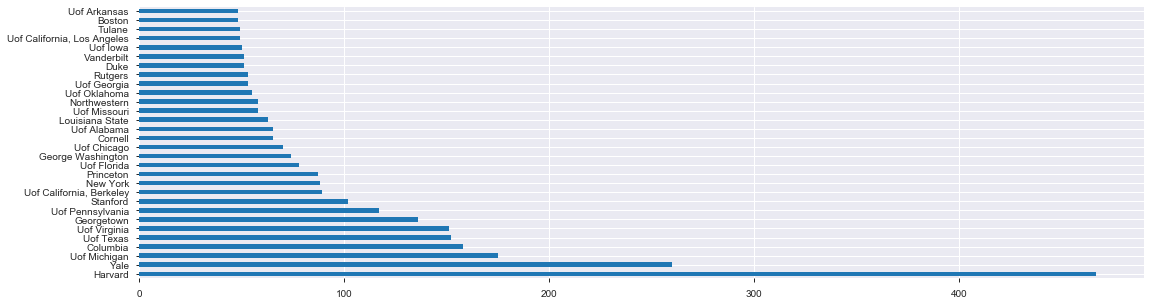

In [223]:
allschool_df.School_Neat.value_counts().head(30).plot(kind='barh', figsize=(18, 5))

In [222]:
allschool_df.groupby(by='Party_of_Appointing_President_1').School_Neat.value_counts(1)

Party_of_Appointing_President_1  School_Neat                          
Democratic                       Harvard                                  0.076463
                                 Yale                                     0.044548
                                 Uof Texas                                0.028590
                                 Columbia                                 0.027593
                                 Georgetown                               0.022939
                                 Uof Michigan                             0.020944
                                 Uof Virginia                             0.020612
                                 Uof Florida                              0.017287
                                 Uof California, Berkeley                 0.016290
                                 Stanford                                 0.015957
                                 Uof Pennsylvania                         0.014628
                

In [176]:
df.Degree_1.value_counts().head()

B.A.      1323
A.B.       715
LL.B.      416
B.S.       387
B.B.A.      53
Name: Degree_1, dtype: int64

In [112]:
allschool_df.to_csv('allschool.csv', index=False)

,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5,variable,value,cleaned
0,B.A.,J.D.,NaN,NaN,NaN,School_1,Brown University,Brown
1,B.A.,J.D.,NaN,NaN,NaN,School_1,Cornell University,Cornell
2,LL.B.,NaN,NaN,NaN,NaN,School_1,Brooklyn Law School,Brooklyn
3,B.A.,NaN,NaN,NaN,NaN,School_1,Washington College (now Washington and Jeffers...,Washington and Jefferson
4,B.A.,LL.B.,NaN,NaN,NaN,School_1,Birmingham-Southern College,Birmingham-Southern
5,LL.B.,NaN,NaN,NaN,NaN,School_1,Rutgers School of Law -- Newark,Rutgers
6,B.S.,J.D.,NaN,NaN,NaN,School_1,Marquette University,Marquette
7,J.D.,NaN,NaN,NaN,NaN,School_1,Rutgers School of Law -- Newark,Rutgers
8,LL.B.,NaN,NaN,NaN,NaN,School_1,University of Michigan Law School,Uof Michigan
9,B.S.,LL.B.,M.A.,NaN,NaN,School_1,Temple University,Temple


In [ ]:
df[df['School_1'].isin(['Harvard University', 'Yale University', 'Brown University', 'Columbia University', 'Princeton University'])]

# Confirmation Dates

In [218]:
df['Confirmation_Duration_Total'] = df.Confirmation_Date_1 - df.Nomination_Date_1
df.Confirmation_Duration_Total.sort_values(ascending=False).head(60)

1081   639 days
1142   540 days
3577   539 days
2314   531 days
1512   524 days
956    484 days
2011   479 days
3019   479 days
739    479 days
1788   463 days
1954   460 days
2542   447 days
2191   444 days
3412   441 days
2148   437 days
755    432 days
1609   423 days
3666   417 days
1933   415 days
220    413 days
861    409 days
236    408 days
3193   403 days
2362   400 days
1433   392 days
2099   391 days
1337   388 days
22     386 days
2578   383 days
2856   382 days
3565   376 days
1133   365 days
2646   365 days
118    355 days
3235   355 days
804    350 days
2940   339 days
2163   334 days
311    334 days
2804   330 days
2825   330 days
688    323 days
643    317 days
3368   317 days
2214   317 days
766    317 days
2850   316 days
656    316 days
339    315 days
3083   314 days
1340   313 days
1303   312 days
385    312 days
1726   312 days
2120   311 days
474    308 days
3006   307 days
2916   307 days
3395   307 days
3327   307 days
Name: Confirmation_Duration_Total, dtype

In [ ]:
timedelta

In [ ]:
# df[df['date'] >='20140905'].head()

In [ ]:
# df[(df['sku'].str.contains('B1-531')) & (df['quantity']>40)].sort(columns=['quantity','name'],ascending=[0,1])